# Loan Prediction

**Data Set Information:** The training data contains 22500 observations with the predictor variables as well as the response variable. The test set contains 7500 observations with the response variable removed.

**Task:** Predict the response variable (default status) for the test data.

**IMPORTANT:** Please include the variable "ID" in the prediction, so that model accuracy can be evaluated.

**Variable descriptions:** This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 

This study reviewed the literature and used the following 23 variables as explanatory variables: 
- **X1:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- **X2:** Gender (1 = male; 2 = female). 
- **X3:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- **X4:** Marital status (1 = married; 2 = single; 3 = others). 
- **X5:** Age (year). 
- **X6 - X11:** History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
- **X6** = the repayment status in September, 2005; 
- **X7** = the repayment status in August, 2005; . . .;
- **X11** = the repayment status in April, 2005. The measurement scale for the repayment status is: 
 - -1 = pay duly; 
 - 1 = payment delay for one month; 
 - 2 = payment delay for two months; . . .; 
 - 8 = payment delay for eight months; 
 - 9 = payment delay for nine months and above. 
 - -2 = indicates no consumption in the month, and a value of 
 - 0 = indicates the use of revolving credit (equivalent to prepayment)
- **X12-X17:** Amount of bill statement (NT dollar). 
- **X12** = amount of bill statement in September, 2005; 
- **X13** = amount of bill statement in August, 2005; . . .; 
- **X17** = amount of bill statement in April, 2005. 
- **X18-X23:** Amount of previous payment (NT dollar). 
- **X18** = amount paid in September, 2005; 
- **X19** = amount paid in August, 2005; . . .;
- **X23** = amount paid in April, 2005. 

## The below Report is divided into 3 main sections namely:

### 1. Initialize Libraries, Load Data & Preprocess
### 2. Exploratory Data Analysis and Visualization
### 3. Predictive Modeling

- ### Goal of the study is to create a model that predicts if a client will default on credit card payment in next month.
- ### This is a Supervised binary classification problem. Where Defaulter Yes(1) or No(0) is the dependant variable

To find the predictability of a defaulter our main objective is to find what features can play a role to predict a credit card defaulter? Therefore we need to find answers to some questions like:
- **1.** Is the % of defaulters significantly different between male & female ?
- **2.** How does Marital Status effect the proportion of defaulters ?
- **3.** Does the Level of Education play a role in the % of defaulters ?
- **4.** Which age group constitutes for higher proportion of defaulters ?
- **5.** Is the number of defaulters correlated with credit limit ?
- **6.** Is there a pattern in past repayment statuses which can help predict probability of a defaulter ?
- **7.** Does the history of credit card bill amount has a correlation with the % of defaulters ?

# 1. Initialize Libraries, Load Data & Preprocess

In [1]:
# Import the required Packages
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
#InteractiveShell.ast_node_interactivity = "all" # Display all values of a jupyter notebook cell

In [3]:
# Read the data into DataFrames.
train = pd.read_csv("credit_card_default_TRAIN.csv",index_col=0)
test = pd.read_csv("credit_card_default_TEST.csv",index_col=0) 

In [4]:
# Breif look at the data
train.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
Variable,,,,,,,,,,,,,,,,,,,,,,,,
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
test.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Variable,,,,,,,,,,,,,,,,,,,,,,,
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
22501,180000,2,2,1,33,-1,-1,-1,-1,-1,-1,3490,0,1112,10383,1980,2672,0,1112,10383,1980,2672,2197
22502,230000,2,1,2,33,0,0,0,0,0,0,38646,40000,41354,42368,43161,45056,2000,2000,2000,1800,2600,2000
22503,50000,2,2,2,44,0,0,2,3,2,0,16094,18961,20857,20229,19623,19878,3155,2500,0,0,707,713
22504,260000,2,2,2,32,0,0,0,0,0,0,251330,256988,234260,227884,202178,198467,10000,9014,11002,7503,7502,7500


- **Fix the Header of the data**

In [6]:
# Fix Header of the data, row 0 serves as more sensible header names
def fix_header(data):
    new_header = data.iloc[0]    # take the first row for the header
    data = data[1:]              # take the data without the header row
    data.columns = new_header    # set the header row as the df header
    data.rename(columns={'default payment next month':'DEFAULTER'}, inplace=True) # change column name
    return data

train = fix_header(train)
test = fix_header(test)

In [7]:
# look at the data with fixed header
train.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
Variable,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
test.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Variable,,,,,,,,,,,,,,,,,,,,,,,
22501,180000,2,2,1,33,-1,-1,-1,-1,-1,-1,3490,0,1112,10383,1980,2672,0,1112,10383,1980,2672,2197
22502,230000,2,1,2,33,0,0,0,0,0,0,38646,40000,41354,42368,43161,45056,2000,2000,2000,1800,2600,2000
22503,50000,2,2,2,44,0,0,2,3,2,0,16094,18961,20857,20229,19623,19878,3155,2500,0,0,707,713
22504,260000,2,2,2,32,0,0,0,0,0,0,251330,256988,234260,227884,202178,198467,10000,9014,11002,7503,7502,7500
22505,260000,2,2,2,33,-1,-1,-1,-1,-1,0,5188,12357,28656,7497,7685,15434,13000,29022,7500,27769,12000,6200


In [9]:
test.shape

(7500, 23)

In [10]:
# Check for Null values in the datasets
train.isnull().values.any(),test.isnull().values.any()

(False, False)

- **DataSets do not have any Null values**

- **Combine Train and Test Data set for further analysis & preprocessing**

In [11]:
# Combine Train and Test Data set for further analysis & preprocessing
train['Type'] = 'Train'
test['Type'] = 'Test'
fulldata = pd.concat([train,test],axis=0) 

In [12]:
#fulldata.shape

In [13]:
fulldata.describe()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULTER,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,Type
count,30000,30000,30000,30000,30000,30000,30000,22500,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,56,22723,22346,22026,21548,21010,20604,2,7,81,4,11,11,11,11,10,10,7943,7899,7518,6937,6897,6939,2,2
top,29,0,0,0,0,0,0,0,2,50000,2,0,0,0,0,0,0,0,0,0,0,0,0,2,Train
freq,1605,2008,2506,2870,3195,3506,4020,17412,14030,3365,15964,14737,15730,15764,16455,16947,16286,5249,5396,5968,6408,6703,7173,18112,22500


In [14]:
fulldata.shape

(30000, 25)

- **From Above Table we can deduce that some columns have extra values which might not be correct According to the Description given i.e.**
 - EDUCATION has 7 unique values instead of 4
 - MARRIAGE has 4 unique values instead of 3

In [15]:
fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

- **According to description we should have values 1,2,3,4 thus we will change 5,6,0 to 4 i.e. others**

In [16]:
fulldata.EDUCATION[fulldata.EDUCATION=='0']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='5']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='6']='4'
fulldata.EDUCATION.unique()

array(['2', '1', '3', '4'], dtype=object)

In [17]:
fulldata.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

- **According to description we should have values 1,2,3 thus we will change 0 to 3 i.e. others**

In [18]:
fulldata.MARRIAGE[fulldata.MARRIAGE=='0']='3'
fulldata.MARRIAGE.unique()

array(['1', '2', '3'], dtype=object)

In [19]:
fulldata.SEX.unique()

array(['2', '1'], dtype=object)

In [20]:
# Check for values less than 0
#(fulldata.AGE[fulldata.AGE<0].count(),fulldata.LIMIT_BAL[fulldata.LIMIT_BAL<0].count())

In [21]:
# Split back the combined data to train & test
train=fulldata[fulldata['Type']=='Train']
test=fulldata[fulldata['Type']=='Test']

In [22]:
# drop the non numeric column
train.drop(['Type'],axis = 1, inplace=True)
test.drop(['Type'],axis = 1, inplace=True)

# Change variables to type float
train = train.astype(float)
test = test.astype(float)

# 2. Exploratory Data Analysis and Visualization

In [23]:
train.DEFAULTER.mean()*100

22.613333333333333

Class 0: 17412
Class 1: 5088
Proportion: 3.42 : 1


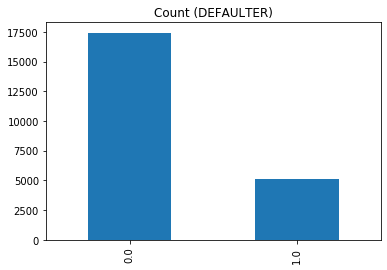

In [24]:
DEFAULTER_count = train.DEFAULTER.value_counts()
print('Class 0:', DEFAULTER_count[0])
print('Class 1:', DEFAULTER_count[1])
print('Proportion:', round(DEFAULTER_count[0] / DEFAULTER_count[1], 2), ': 1')

DEFAULTER_count.plot(kind='bar', title='Count (DEFAULTER)');

- 22.61 % of people are defaulters in the Train data

### Visualize Data with t-SNE

t-SNE is a technique for dimensionality reduction that is well suited to visualise high-dimensional datasets. Lets have a first look on the map that will set some expectations for the prediction accuracy i.e. if our dataset has many overlaps it would be good if our model achieves an accuracy of 60-70%.!

Class 0: 1000
Class 1: 1000
Proportion: 1.0 : 1


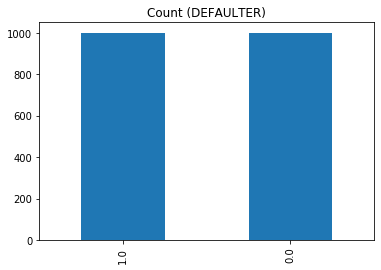

In [25]:
#Set df4 equal to a set of a sample of 1000 deafault and 1000 non-default observations.
df2 = train[train.DEFAULTER == 0].sample(n = 1000)
df3 = train[train.DEFAULTER == 1].sample(n = 1000)
df4 = pd.concat([df2, df3], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df4_std = standard_scaler.fit_transform(df4)

#Set y equal to the target values.
y = df4.DEFAULTER

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df4_std)

DEFAULTER_count = y.value_counts()
print('Class 0:', DEFAULTER_count[0])
print('Class 1:', DEFAULTER_count[1])
print('Proportion:', round(DEFAULTER_count[0] / DEFAULTER_count[1], 2), ': 1')
DEFAULTER_count.plot(kind='bar', title='Count (DEFAULTER)');


**The plot reveals a rather mixed up dataset which means we should not expect very accurate model.**

- **Now let us check the correlation between different features**

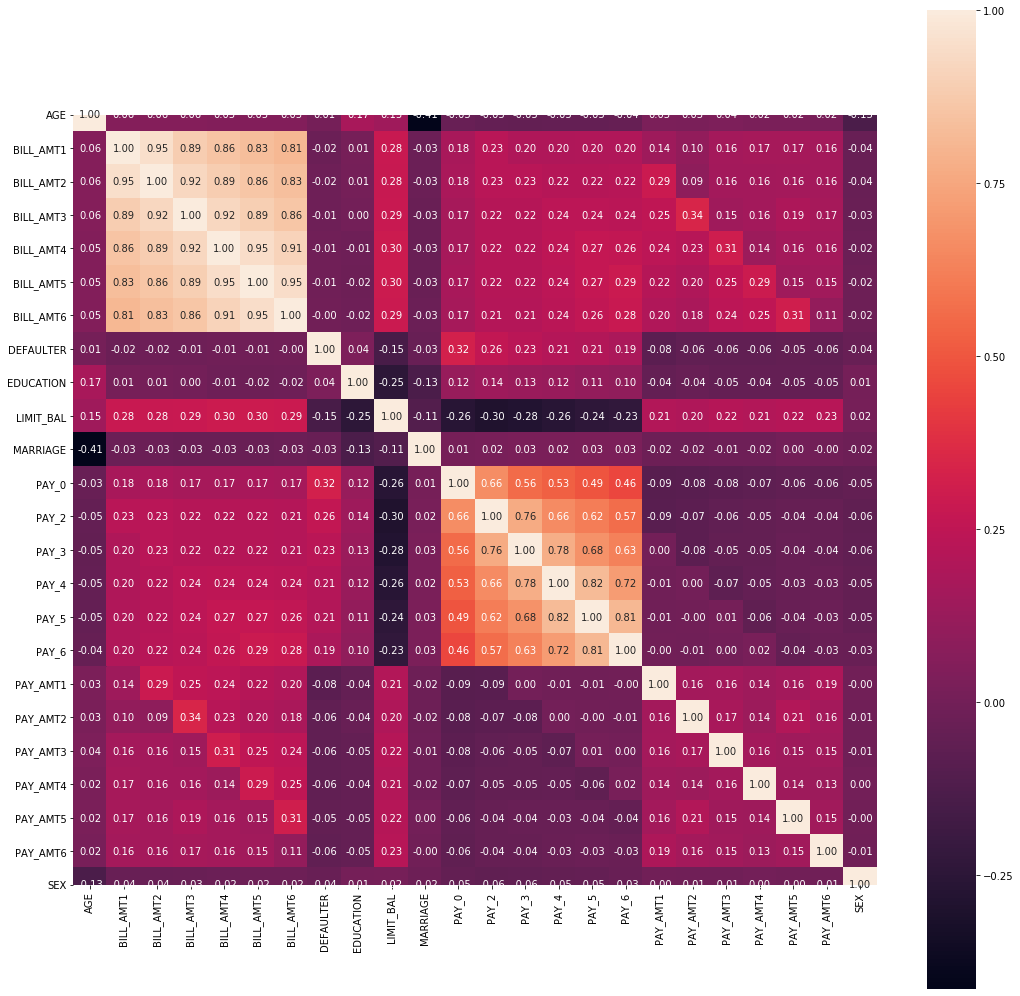

In [26]:
cor = train.corr()
plt.figure(figsize=(18,18))
sns.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

Figure shows that 'BILL_AMTX' are highly correlated to each other, but very less correlation to target label 'DEFAULTER'. When data is huge to save computational resource, such features can be dropped without losing significant prediction power.

Payment statuses 'PAY' show highest contribution to the defaulter label.

- **We can see above that PAY_0,PAY_2...have high positive correlation to DEFAULTER and LIMIT_BAL has pretty high negative correlation**

### Feature Engineering 

The regression coefficients are positive i.e. log-odds of defaulters increase as the ratio of  $\left(\frac{\text{bill amount} - \text{pay amount}}{\text{credit limit}}\right)$ increases. Hence we can add below 6 features.

In [27]:
train['BILL_PAY_RATIO1'] = (train['BILL_AMT1']-train['PAY_AMT1'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO2'] = (train['BILL_AMT2']-train['PAY_AMT2'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO3'] = (train['BILL_AMT3']-train['PAY_AMT3'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO4'] = (train['BILL_AMT4']-train['PAY_AMT4'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO5'] = (train['BILL_AMT5']-train['PAY_AMT5'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO6'] = (train['BILL_AMT6']-train['PAY_AMT6'])/train['LIMIT_BAL']

test['BILL_PAY_RATIO1'] = (test['BILL_AMT1']-test['PAY_AMT1'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO2'] = (test['BILL_AMT2']-test['PAY_AMT2'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO3'] = (test['BILL_AMT3']-test['PAY_AMT3'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO4'] = (test['BILL_AMT4']-test['PAY_AMT4'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO5'] = (test['BILL_AMT5']-test['PAY_AMT5'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO6'] = (test['BILL_AMT6']-test['PAY_AMT6'])/test['LIMIT_BAL']

In [28]:
train.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULTER,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,BILL_PAY_RATIO1,BILL_PAY_RATIO2,BILL_PAY_RATIO3,BILL_PAY_RATIO4,BILL_PAY_RATIO5,BILL_PAY_RATIO6
Variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,1.0,2.0,20000.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,689.0,0.0,0.0,0.0,0.0,2.0,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000
2,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,1.0,2.0,120000.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2.0,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508
3,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,0.0,2.0,90000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,2.0,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211
4,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,0.0,2.0,50000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,2.0,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940
5,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,0.0,2.0,50000.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040


In [29]:
# function to make a bar plot
def plot0(col1, col2, tittle, xticks, train):
    dt = train.groupby(col1).agg([np.mean])*100.0
    dt = dt[col2].reset_index()
    f, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x=col1, y="mean", data=dt)
    ax.set(xlabel="", ylabel="Defaulter %")
    ax.set_title(label=tittle, fontsize=15)
    ax.set_xticklabels(xticks, fontsize=11)

## 1. Is the % of defaulters significantly different between male & female ?
- _Below we plot the % of Defaulters by Gender._**Apparently we see that males are slightly more likely to default.**

Observations:
- Approximately 24.2% of the males defaulted.
- Approximately 20.8% of the females defaulted.

In [30]:
#Crosstab
sex_crosstab = pd.crosstab(train['DEFAULTER'], train['SEX'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Male', 2 : 'Female'}
sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
sex_crosstab/sex_crosstab.loc['All']

SEX,Male,Female,All
DEFAULTER,,,
Non-default,0.753848,0.786656,0.773867
Default,0.246152,0.213344,0.226133
All,1.000000,1.000000,1.000000


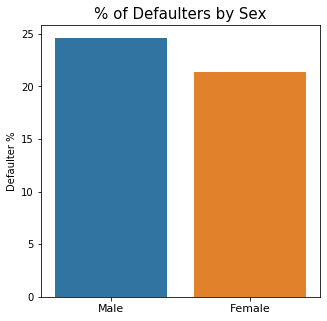

In [31]:
#Bar Chart
col1 = "SEX"
col2 = "DEFAULTER"
tittle = "% of Defaulters by Sex"
xticks = ["Male", "Female"]
plot0(col1, col2, tittle, xticks, train)

## 2. How does Marital Status effect the proportion of defaulters ?
- _Below we plot the % of Defaulters by Marital Status._**We see that in the dataset Married people are slightly more likely to default.**

Observations:
- Approximately 24.2% of the Married people defaulted.
- Approximately 21.2% of the Single people defaulted.

In [32]:
#Crosstab
marital_crosstab = pd.crosstab(train['DEFAULTER'], train['MARRIAGE'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Married', 2 : 'Single', 3:'Others'}
marital_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
marital_crosstab/marital_crosstab.loc['All']

MARRIAGE,Married,Single,Others,All
DEFAULTER,,,,
Non-default,0.757457,0.78738,0.769759,0.773867
Default,0.242543,0.21262,0.230241,0.226133
All,1.000000,1.00000,1.000000,1.000000


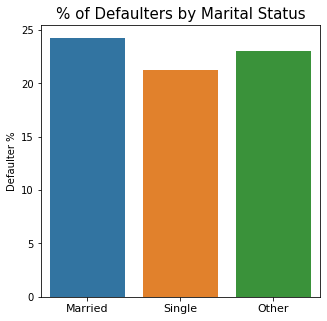

In [33]:
#Bar Chart
col1 = "MARRIAGE"
col2 = "DEFAULTER"
tittle = "% of Defaulters by Marital Status"
xticks = ["Married", "Single", "Other"]
plot0(col1, col2, tittle, xticks, train)

## 3. Does the Level of Education play a role in the % of defaulters ?**
- _Below we plot the % of Defaulters by Education._**We can see that higher the education less likely is the person to default.**

Observations:
- Approximately 25.8% of defaulters studied upto High School.
- Approximately 23.7% of defaulters studied upto University.
- Approximately 19.7% of defaulters studied upto Graduate School.

In [34]:
#Crosstab
education_crosstab = pd.crosstab(train['DEFAULTER'], train['EDUCATION'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Graduate school', 2 : 'University', 3 : 'High school', 4 : 'Others'}
education_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
education_crosstab/education_crosstab.loc['All']

EDUCATION,Graduate school,University,High school,Others,All
DEFAULTER,,,,,
Non-default,0.802681,0.758699,0.741134,0.933993,0.773867
Default,0.197319,0.241301,0.258866,0.066007,0.226133
All,1.000000,1.000000,1.000000,1.000000,1.000000


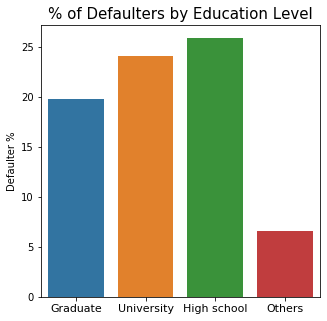

In [35]:
#Bar Chart
col1 = "EDUCATION"
col2 = "DEFAULTER"
tittle = "% of Defaulters by Education Level"
xticks = ["Graduate", "University", "High school", "Others"]
plot0(col1, col2, tittle, xticks, train)

## 4. Which age group constitutes for higher proportion of defaulters ?
- _Below we can see the Defaulters distribution by Age_ **Majority of defaulters fall in the age group of 25 to 35**


Observations:
- Defaulters seems to increase from the early 20s to the early 30s.
- Defaulters seems to decrease from the early 40s onward.

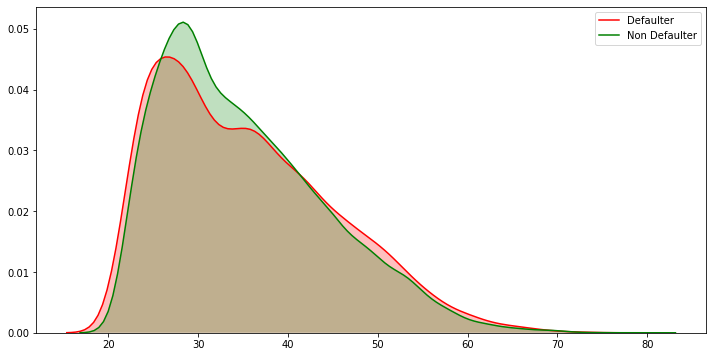

In [36]:
defaulters = train[train["DEFAULTER"] == 1]
non_defaulters = train[train["DEFAULTER"] == 0]
defaulters["Defaulter"] = defaulters["AGE"]
non_defaulters["Non Defaulter"] = non_defaulters["AGE"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"], shade=True, color="r")
ax = sns.kdeplot(non_defaulters["Non Defaulter"], shade=True, color="g")

## 5. Is the number of defaulters correlated with credit limit ?
- _Below we can see the Defaulters distribution by Credit Limit_ **we can see that people with lower credit balance tend to default more**

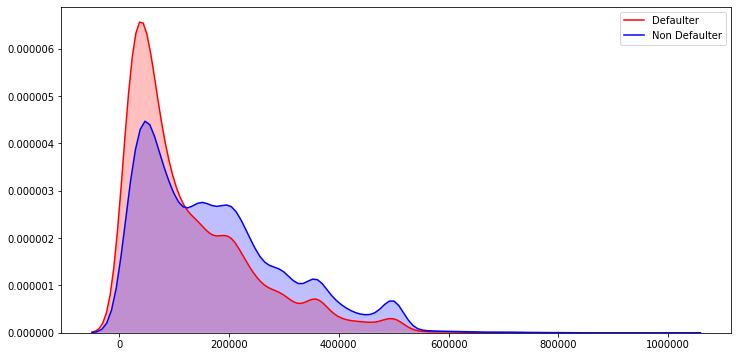

In [37]:
defaulters = train[train["DEFAULTER"] == 1]
non_defaulters = train[train["DEFAULTER"] == 0]
defaulters["Defaulter"] = defaulters["LIMIT_BAL"]
non_defaulters["Non Defaulter"] = non_defaulters["LIMIT_BAL"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"], shade=True, color="r")
ax = sns.kdeplot(non_defaulters["Non Defaulter"], shade=True, color="b")

In [38]:
# function to make a scatter plot
def plot1(label_list, label_dict, data, col,tittle,xlabel,ylabel, ticks):
  df = {}
  for i in label_list:
      df[i] = data.groupby([i, col]).size().unstack()
      df[i] = df[i][df[i].sum(axis=1)>25]
      df[i] = df[i].div(df[i].sum(axis=1), axis='index') # Calculate proportions
      df[i].sort_index(ascending=False, inplace=True)
          
  sns.set_palette(sns.light_palette("red", reverse=True))   # plot
  fig, ax = plt.subplots(1, 1, figsize=(6,4))

  for i in label_list:
      ax.scatter(x=df[i].index, y=df[i][1], label=label_dict.get(i), s=100, edgecolor='k', lw=1)          

  ax.set_ylim([0, 1])
  plt.xticks(ticks, rotation=0)
  ax.xaxis.set_ticks(ticks=ticks, minor=False)
  ax.grid(b=True, which='major', color='0.4', linestyle='--')
  lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
  for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(14) 
  for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(14) 
  for spine in ax.spines.values():
      spine.set_edgecolor('k')
  sns.set_palette(sns.light_palette("green", reverse=True))
  plt.title(tittle, fontsize=17, y = 1.05) 
  plt.ylabel(xlabel, fontsize=14)
  plt.xlabel(ylabel, fontsize=14)
  plt.show()

## 6. Is there a pattern in past repayment statuses which can help predict probability of a defaulter ?

Observations:
- The proportion of defaulters in delinquency bucket 2 or more i.e. with payment delay for 2 or more months are much higher.

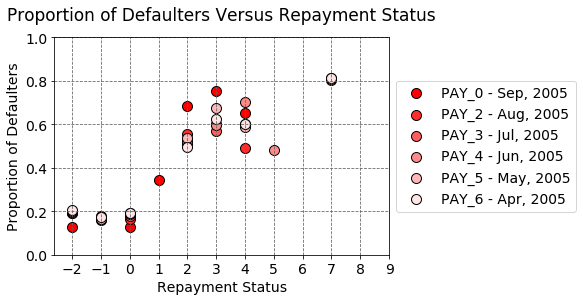

In [39]:
label_list =['PAY_0',  'PAY_2',  'PAY_3',  'PAY_4',  'PAY_5',  'PAY_6']
label_dict ={'PAY_0': 'PAY_0 - Sep, 2005', 
             'PAY_2': 'PAY_2 - Aug, 2005', 
             'PAY_3': 'PAY_3 - Jul, 2005', 
             'PAY_4': 'PAY_4 - Jun, 2005',  
             'PAY_5': 'PAY_5 - May, 2005',  
             'PAY_6': 'PAY_6 - Apr, 2005'}

col = 'DEFAULTER'
tittle = 'Proportion of Defaulters Versus Repayment Status'
xlabel = 'Proportion of Defaulters'
ylabel = 'Repayment Status'
ticks = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8,9]
plot1(label_list, label_dict, train, col,tittle,xlabel,ylabel,ticks)

## 7. Does the history of credit card bill amount has a correlation with the % of defaulters ?


Observations:
- The proportion of defaulters is positively correlated with bill amount in recent months.

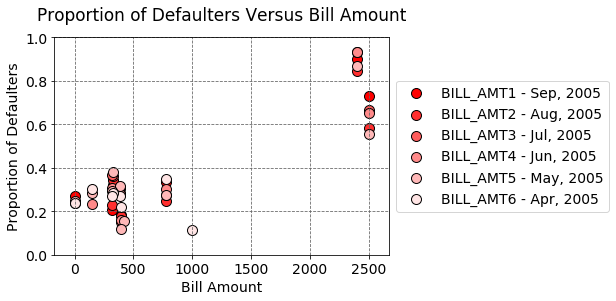

In [40]:
label_list =['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
label_dict ={'BILL_AMT1': 'BILL_AMT1 - Sep, 2005',  
             'BILL_AMT2': 'BILL_AMT2 - Aug, 2005',
             'BILL_AMT3': 'BILL_AMT3 - Jul, 2005', 
             'BILL_AMT4': 'BILL_AMT4 - Jun, 2005',  
             'BILL_AMT5': 'BILL_AMT5 - May, 2005', 
             'BILL_AMT6': 'BILL_AMT6 - Apr, 2005'}

col = 'DEFAULTER'
tittle = 'Proportion of Defaulters Versus Bill Amount'
xlabel = 'Proportion of Defaulters'
ylabel = 'Bill Amount'
ticks = []
for i in range(0, 3000, 500):
    ticks.append(round(i,1))
plot1(label_list, label_dict, train, col,tittle,xlabel,ylabel,ticks)

# 3. Predictive Modeling

In [41]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
warnings.filterwarnings('ignore') # to supress warnings

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
x = train.drop(['DEFAULTER'],axis = 1)
y = train.DEFAULTER

# rescale the metrics to the same mean and standard deviation
scaler = preprocessing.StandardScaler()
x = scaler.fit(x).transform(x)

# Further divide the train data into train test split 70% & 30% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

**Here we are first trying out below listed classification models to get the first look at accuracy**

In [ ]:
# list of different classifiers we are going to test
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
'XGBClassifier': XGBClassifier()
}

In [ ]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

### From above report we can see that highest accuracy is given by XGboost followed by GradientBoosting, let us compare both.

In [ ]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print( 'Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print( conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    #prob = md.predict_proba(x_test)[:,1]
    print( ' ' )
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print( 'Accuracy on Test set: ', md.score(x_test, y_test))
    print( ' ')
    print(classification_report(y_test, pred))
    print( ' ')
    print('Confusion Matrix',confmat(pred, y_test))
    
    #roc(prob, y_test)
    return md

### Parameter tuning

There are a few parameters that require tuning to improve the performance. I use GridSearchCV method to test model through a series of parameter values.

### GradientBoosting

In [ ]:
# Use gridsearch to fine tune the parameters
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1]}
gridsearch(gb, gb_params,x_train, x_test, y_train, y_test,5)

In [ ]:
# feature selection with the best model from grid search
gb = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 7,n_estimators=300, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(gb, x_train, y_train,x_test, y_test)

### XGboost

In [ ]:
# Use gridsearch to fine tune the parameters
xgb = XGBClassifier()
xgb_params = {'n_estimators':[200,300],'learning_rate':[0.05,0.02], 'max_depth':[4],'min_child_weight':[0],'gamma':[0]}
gridsearch(xgb, xgb_params,x_train, x_test, y_train, y_test,5)

In [ ]:
# feature selection with the best model from grid search
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=200,
 max_depth=4,
 min_child_weight=0,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
model_xgb = model(xgb, x_train, y_train,x_test, y_test)

The classification metrics of iterest for this fairly imbalanced dataset are: 
- precision = tp / (tp + fp)
- recall = tp / (tp + fn)
- f1 = 2(precision)(recall) / (precision + recall)
- Roc curve area

Depending upon banks operational costs & ideology a large bank may follow the principal that fewer False Positives are preferable over a few more False Negatives to be able to lend more & spend less on investigations on the contrary a conservative approach would go with the opposite i.e more accuracy.

### Therefore we see that XGBoost trains with little higher accuracy and auc score than GradientBoost. We will use XGBoost for final predictions. i.e. fewer False Positives are preferable over a few more False Negatives

Save the output to csv file in desired format

In [ ]:
#Predict final values on Test data set
test['PREDICTED_STATUS']=np.int_(model_gb.predict(test.drop(['DEFAULTER'],axis = 1)))
test.index.names = ['ID']

In [ ]:
#test.head()

In [ ]:
test['PREDICTED_STATUS'].to_csv("credit_card_default_TRAIN_Predict.csv")

In [ ]:
test.DEFAULTER.mean()*100

In [ ]:
y_train.head()